**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Misael Valentin Partida Bañales
*   MATRÍCULA: A01840415

En esta actividad trabajarás con el archivo `automobile_dataset.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de automóviles, disponible en el repositorio UCI Machine Learning.

Los datos fueron recopilados para analizar diferentes aspectos de los vehículos y sus precios, e incluyen información sobre el fabricante, tipo de motor, dimensiones, peso, rendimiento de combustible y otras especificaciones técnicas. Los indicadores incluidos son:

* `symboling`: Nivel de riesgo del seguro del automóvil, de -3 (bajo riesgo) a +3 (alto riesgo)
* `normalized_losses`: Pérdidas normalizadas del seguro (valor numérico de la aseguradora, algunas veces faltante)
* `make`: Marca del automóvil (por ejemplo, Audi, BMW, Honda)
* `fuel_type`: Tipo de combustible (gasolina o diésel)
* `aspiration`: Tipo de aspiración del motor (normal o turbo)
* `num_doors`: Número de puertas del automóvil (dos o cuatro)
* `body_style`: Estilo de carrocería (sedán, hatchback, wagon, hardtop, convertible)
* `drive_wheels`: Tipo de tracción (fwd: delantera, rwd: trasera, 4wd: en las cuatro ruedas)
* `engine_location`: Ubicación del motor (delantero o trasero)
* `wheel_base`: Distancia entre ejes (en pulgadas)
* `length`: Largo total del automóvil (en pulgadas)
* `width`: Ancho total del automóvil (en pulgadas)
* `height`: Altura total del automóvil (en pulgadas)
* `curb_weight`: Peso del automóvil sin carga (en libras)
* `engine_type`: Tipo de motor (OHV, OHC, DOHC, etc.)
* `num_cylinders`: Número de cilindros del motor
* `engine_size`: Tamaño del motor (en cc)
* `fuel_system`: Sistema de combustible (por ejemplo, mpfi, 2bbl, 4bbl)
* `bore`: Diámetro del cilindro (en pulgadas)
* `stroke`: Carrera del pistón (en pulgadas)
* `compression_ratio`: Relación de compresión del motor
* `horsepower`: Potencia del motor (en caballos de fuerza)
* `peak_rpm`: Revoluciones máximas por minuto
* `city_mpg`: Rendimiento de combustible en ciudad (millas por galón)
* `highway_mpg`: Rendimiento de combustible en carretera (millas por galón)
* `price`: Precio del automóvil (en dólares estadounidenses) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [85]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import FuncFormatter

import os

1. Descarga el archivo: `automobile_dataset.csv` y guarda, en un dataframe (`cars_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Al revisar los primeros registros, notarás que la columna `normalized_losses` contiene el símbolo `?`. Esto sugiere que se utilizó para indicar valores faltantes. Identifica todas las columnas que presentan este símbolo.
* Sustituye el símbolo `?` por valores faltantes (`NaN`) y convierte las columnas al tipo de dato adecuado. Esto es necesario porque la presencia del símbolo pudo haber hecho que pandas las interpretara como object, aunque en realidad no lo fueran.

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
DIR = "/content/drive/MyDrive/Colab Notebooks/Tec MNA/Ciencia y Analitica de Datos/Semana 7/"
os.chdir(DIR)

In [88]:
cars_df = pd.read_csv("automobile_dataset.csv")
# Imprimir el encabezado con sus 10 primeros registros.
cars_df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [89]:
# Obtener resumen de tipos de datos
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    int64  
 16  engine_size        205 non

In [90]:
# Contar columnas numéricas y de tipo texto (object)
num_cols = cars_df.select_dtypes(include=['int64','float64']).columns
text_cols = cars_df.select_dtypes(include=['object']).columns

print('Columnas numericas', len(num_cols))
print('Columnas de texto', len(text_cols))


Columnas numericas 11
Columnas de texto 15


In [91]:
# Identificar columnas que contienen el símbolo '?'
cols_with_question = []

for col in cars_df.columns:
    if (cars_df[col] == '?').any():
        cols_with_question.append(col)

cols_with_question

['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

In [92]:
# Reemplazar '?' por NaN
cars_df.replace('?', np.nan, inplace=True)

In [93]:
# Convertir a tipo numérico las columnas que deberían ser numéricas
cols_to_convert = cols_with_question

for col in cols_to_convert:
    cars_df[col] = pd.to_numeric(cars_df[col], errors='coerce')

In [94]:
# Verificar nuevamente los tipos de datos después de la conversión
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    int64  
 16  engine_size        205 non

In [95]:
# Contar columnas numéricas y de tipo texto (object)
num_cols = cars_df.select_dtypes(include=['int64','float64']).columns
text_cols = cars_df.select_dtypes(include=['object']).columns

print('Columnas numericas', len(num_cols))
print('Columnas de texto', len(text_cols))

Columnas numericas 17
Columnas de texto 9


# Análisis exploratorio de datos (univariado)

2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados e imprime el porcentaje de faltantes por columna.
* Obtén las estadísticas descriptivas, separado las numéricas (incluye asimetría y curtosis) y las categóricas (incluye tablas de frecuencias).
* Genera histogramas para las numéricas y diagramas de barras para las categóricas.

In [96]:
# Verificar registros duplicados
duplicates = cars_df.duplicated().sum()
duplicates

np.int64(0)

In [97]:
# Calcular porcentaje de valores faltantes por columna
missing_percentage = cars_df.isna().mean() * 100
missing_percentage.sort_values(ascending=False)

,0
normalized_losses,20.00000
stroke,1.95122
price,1.95122
bore,1.95122
horsepower,0.97561
peak_rpm,0.97561
make,0.00000
fuel_type,0.00000
aspiration,0.00000
symboling,0.00000


In [98]:
# Obtener estadisticas descriptivas para variables numéricas
num_df = cars_df.select_dtypes(include=['int64','float64'])

desc_num = num_df.describe().T
desc_num['skewness'] = num_df.skew()
desc_num['kurtosis'] = num_df.kurt()

desc_num

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00,0.211072,-0.676271
normalized_losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00,0.765976,0.525440
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90,1.050214,1.017039
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10,0.155954,-0.082895
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30,0.904003,0.702764
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80,0.063123,-0.443812
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00,0.681398,-0.042854
num_cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00,2.817459,13.714866
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00,1.947655,5.305682
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94,0.020016,-0.828945


In [99]:
# Obtener estadisticas descriptivas para variables categóricas
cat_df = cars_df.select_dtypes(include=['object'])

cat_df.describe()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,fuel_system
count,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,mpfi
freq,32,185,168,116,96,120,202,148,94


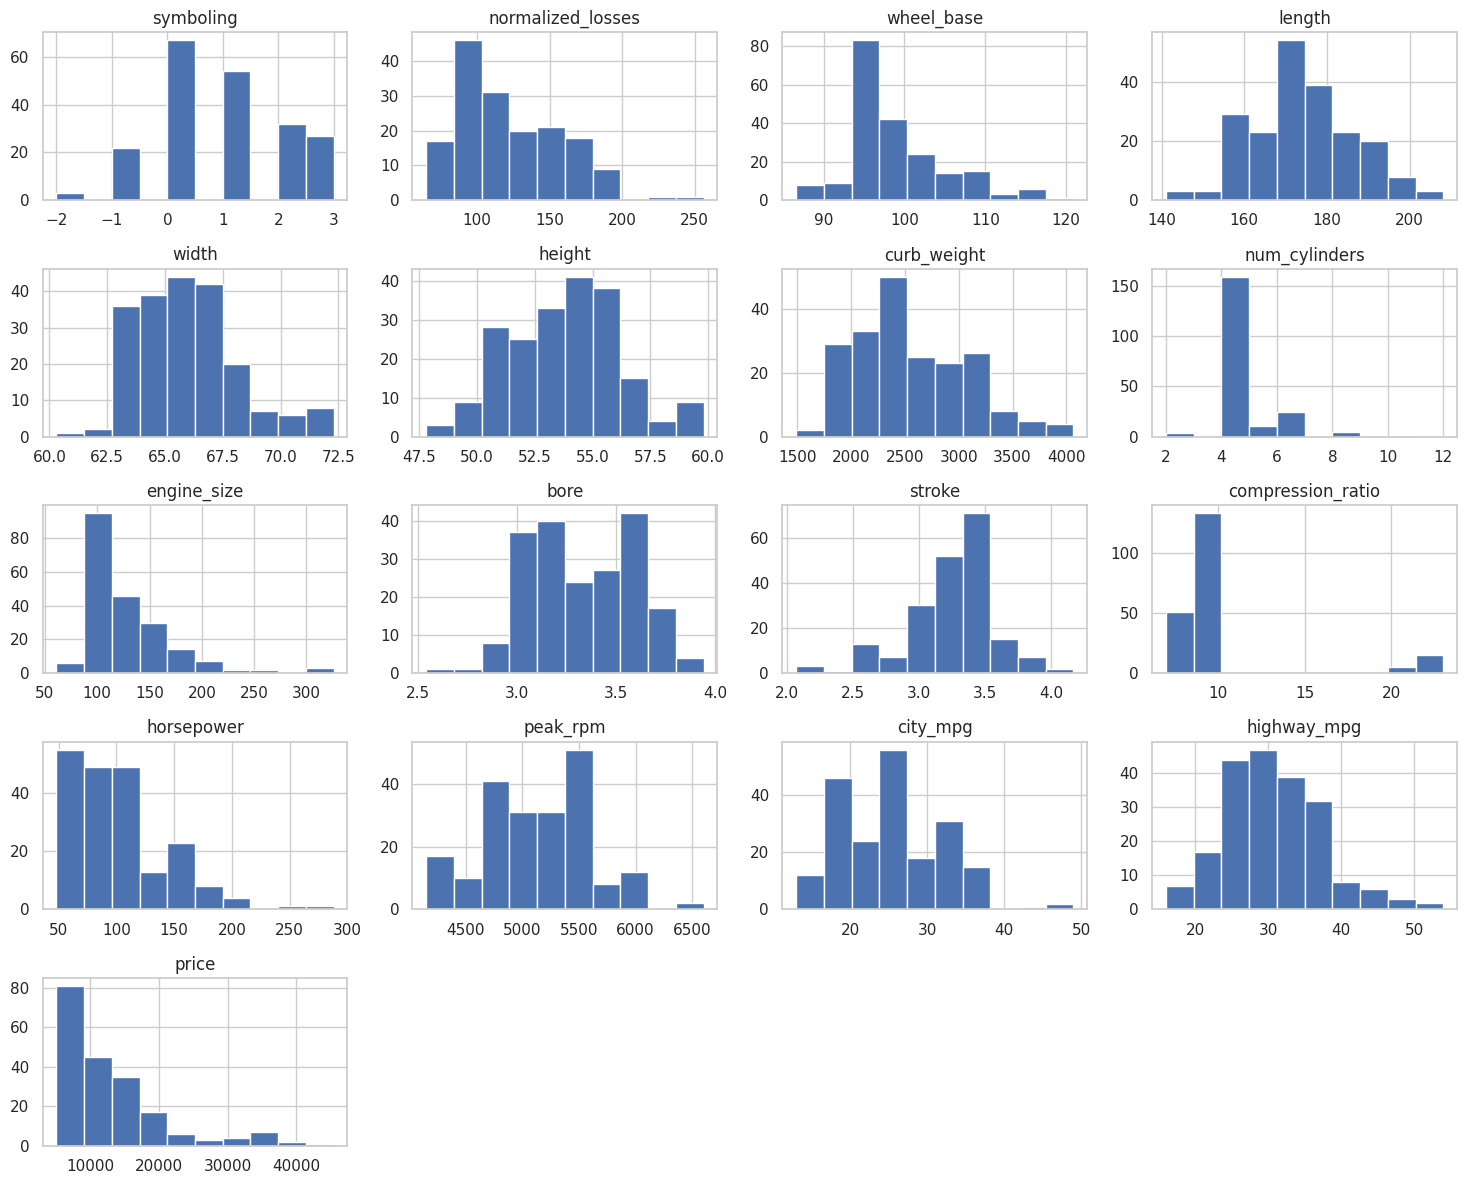

In [100]:
# Generar histogramas para variables numericas
num_df.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

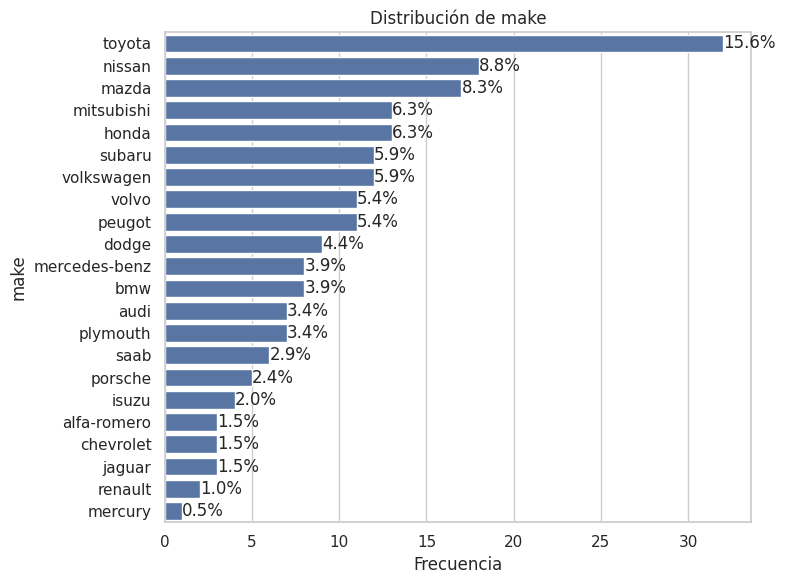

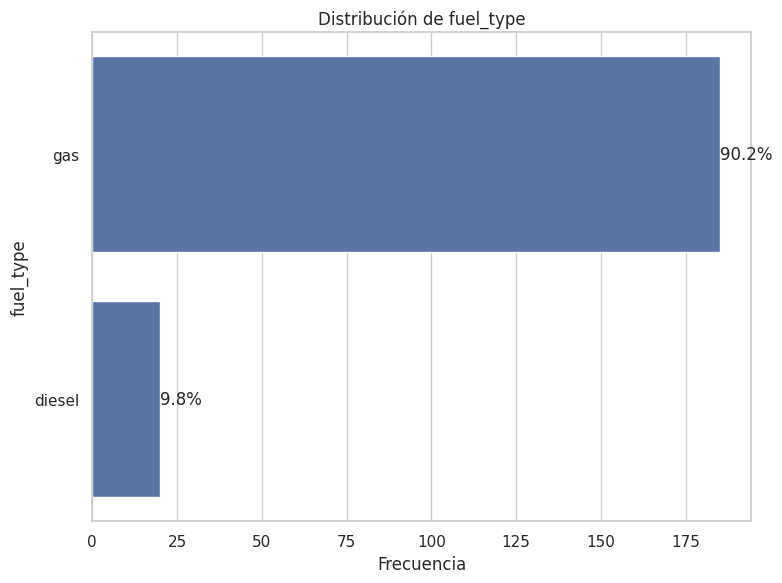

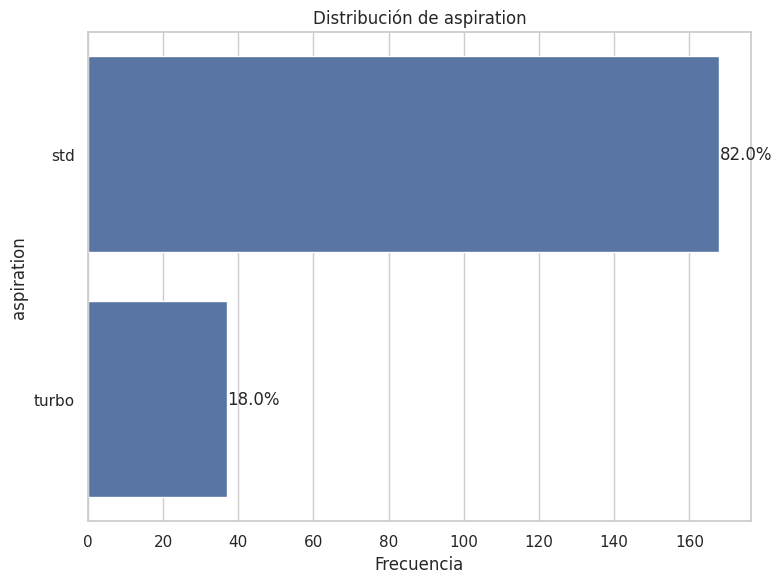

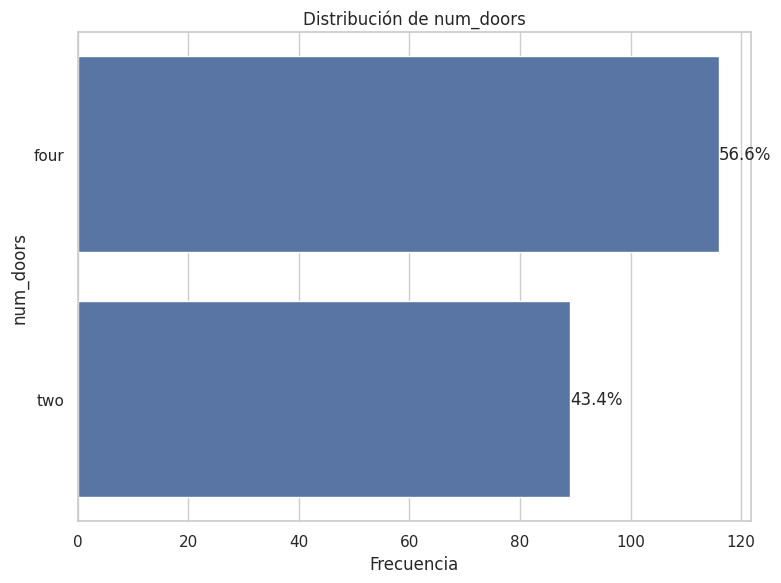

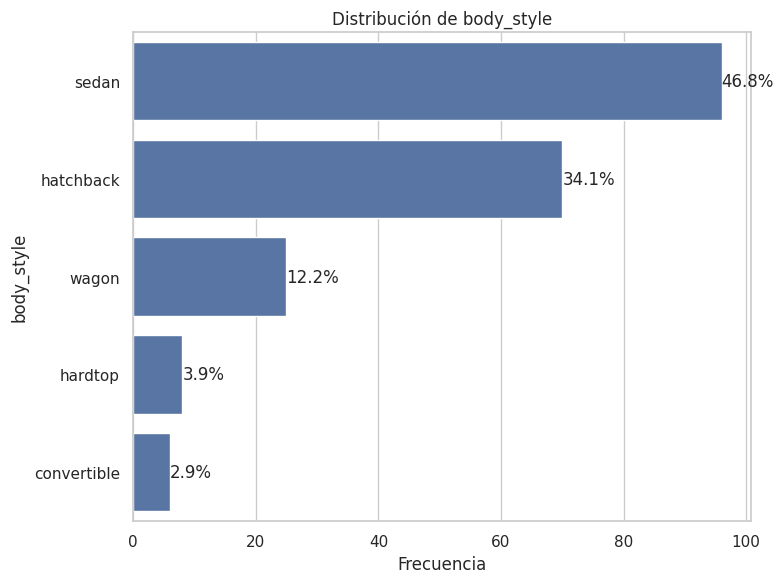

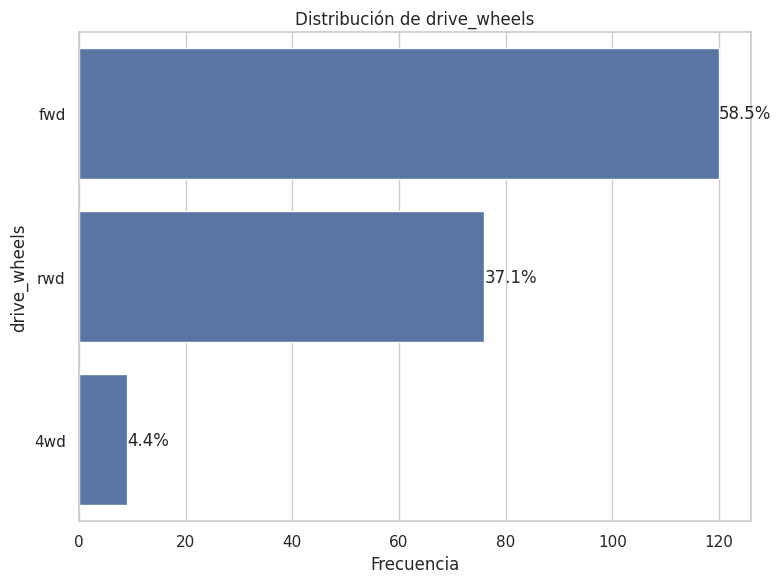

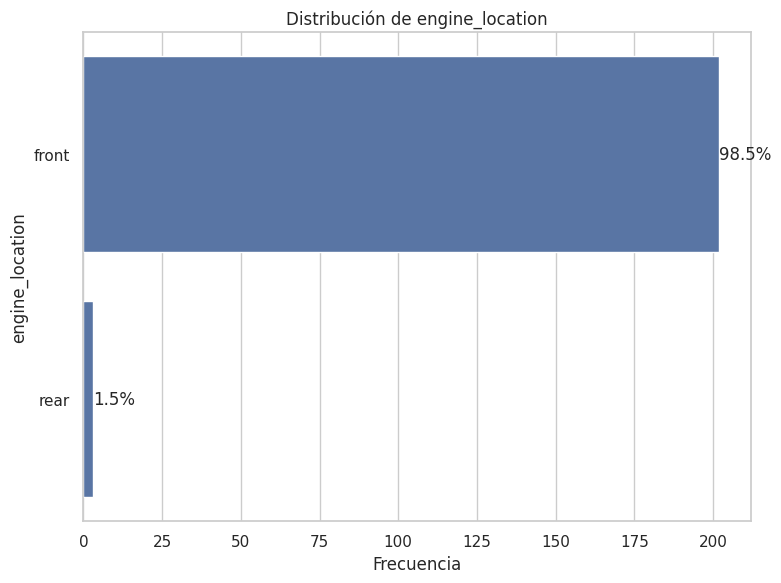

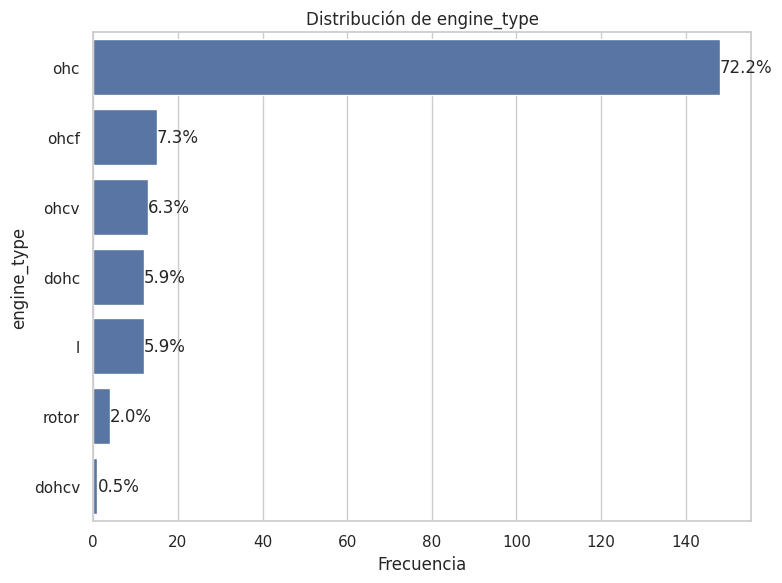

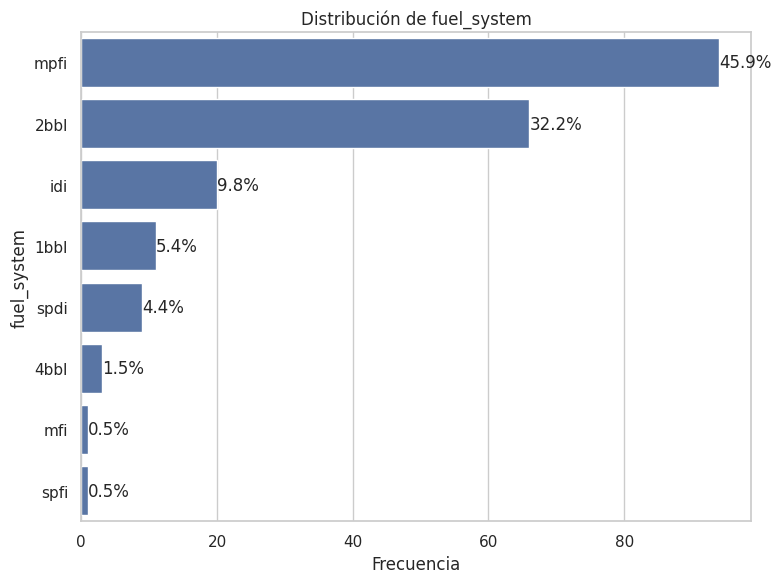

In [101]:
# Generar diagramas horizontales con porcentaje para todas las variables categóricas
sns.set(style="whitegrid")

cat_df = cars_df.select_dtypes(include=['object'])

for col in cat_df.columns:
    
    plt.figure(figsize=(8,6))
    
    order = cars_df[col].value_counts().index
    total = len(cars_df[col].dropna())
    
    ax = sns.countplot(data=cars_df, y=col, order=order)
    
    # Agregar porcentaje a cada barra
    for p in ax.patches:
        count = p.get_width()
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%',
                    (count, p.get_y() + p.get_height()/2),
                    ha='left', va='center')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Análisis exploratorio de datos (bivariado)

3. Genera algunos gráficos bivariados para familiarizarte con el conjunto de datos:
* Gráfico de barras apiladas normalizadas que muestra la distribución de los tipos de tracción para cada fabricante.
* Diagrama de cajas para visualizar cómo se distribuye el precio de los automóviles según el estilo de carrocería. Esto permitirá comparar la mediana, los cuartiles y la presencia de valores atípicos entre los diferentes tipos de carrocería.
* Gráfico de barras que muestre los 10 automóviles más caros, ordenados de mayor a menor precio, con cada barra diferenciada por fabricante.
* Diagrama de dispersión para explorar la relación entre el tamaño del motor y el precio de los automóviles. Diferencia con colores los puntos según el tipo de aspiración y con el tamaño de los puntos el número de puertas.

**Nota.** Debes incluir en cada gráfico una conclusión de lo observado.

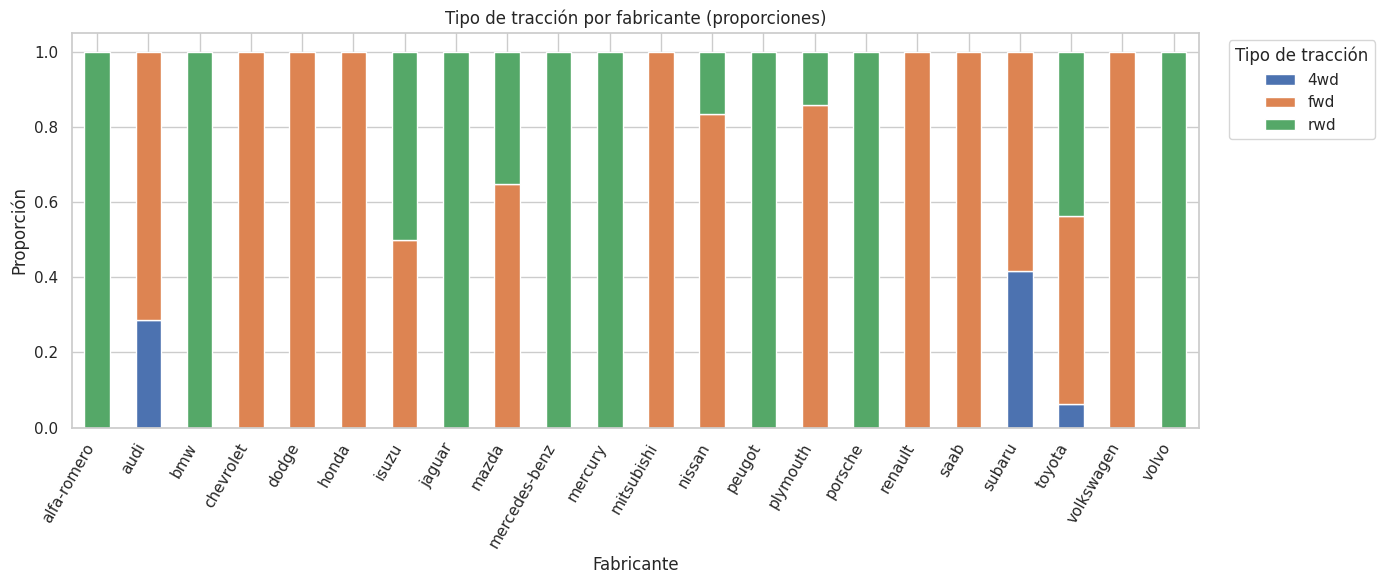

In [102]:
# Barras apiladas normalizadas: drive_wheels por make
crosstab = pd.crosstab(cars_df['make'], cars_df['drive_wheels'], normalize='index').sort_index()

ax = crosstab.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Tipo de tracción por fabricante (proporciones)')
plt.ylabel('Proporción')
plt.xlabel('Fabricante')
plt.xticks(rotation=60, ha='right')
plt.legend(title='Tipo de tracción', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Conclusión
Se observa que la mayoría de los fabricantes concentran su producción en un tipo de tracción dominante. En particular, varios fabricantes presentan una proporción elevada de tracción delantera (fwd), característica común en vehículos compactos y de segmento económico. En contraste, algunos fabricantes muestran mayor presencia de tracción trasera (rwd), asociada típicamente con vehículos deportivos o de gama alta. La tracción en las cuatro ruedas (4wd) aparece en proporciones menores y en un número reducido de fabricantes, lo que sugiere que se trata de configuraciones más especializadas.
___

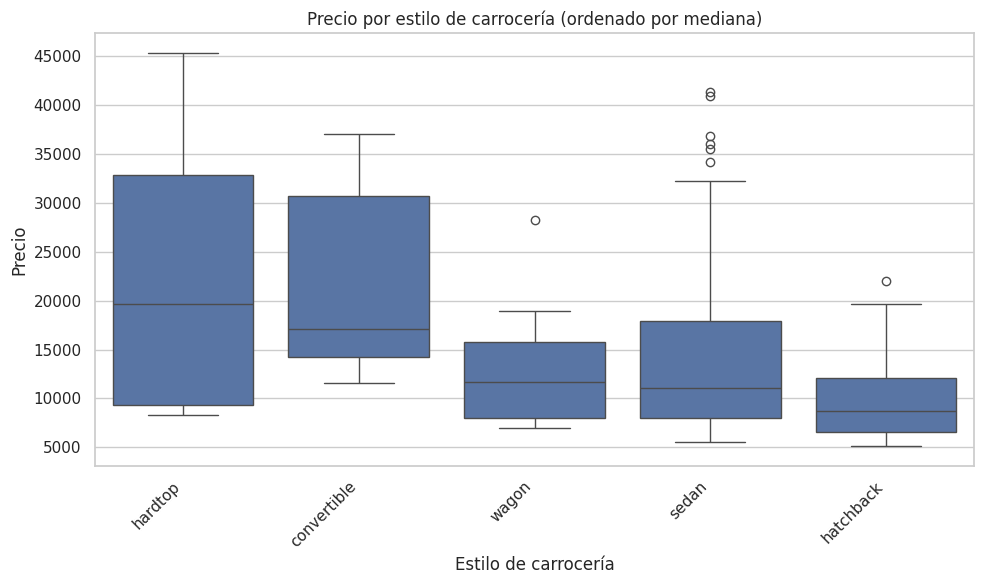

In [103]:
# Diagrama de cajas del precio por body_style
order = cars_df.groupby('body_style')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(10,6))
sns.boxplot(data=cars_df, x='body_style', y='price', order=order)
plt.title('Precio por estilo de carrocería (ordenado por mediana)')
plt.xlabel('Estilo de carrocería')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Conclusión

El precio presenta variaciones importantes según el estilo de carrocería. Los estilos asociados a segmentos premium, como convertibles y hardtops, muestran medianas más elevadas y mayor dispersión, incluyendo valores atípicos en rangos superiores. Por otro lado, estilos como hatchback y sedán presentan medianas más bajas y menor variabilidad. Esto indica que el tipo de carrocería influye significativamente en la estructura de precios del mercado.
___

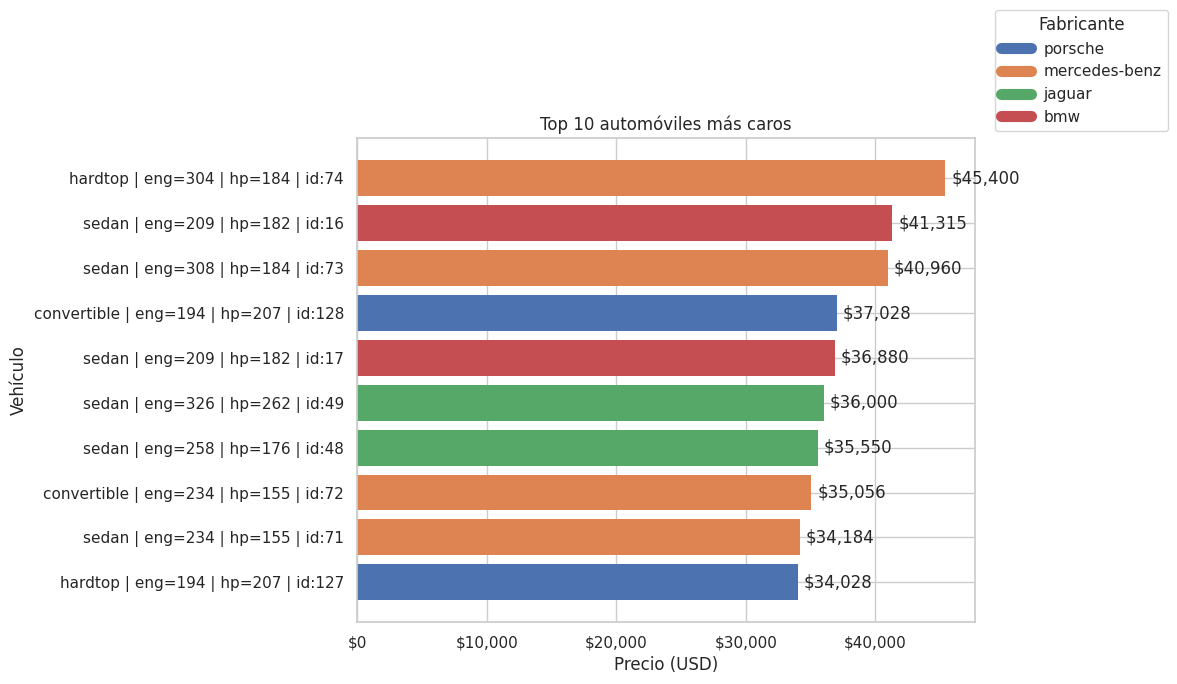

In [104]:
# Top 10 autos más caros con etiquetas únicas en Y basadas en características del vehículo

top10 = (
    cars_df.dropna(subset=['price'])
    .sort_values('price', ascending=False)
    .head(10)
    .copy()
)

top10 = top10.sort_values('price', ascending=True)

top10['car_label'] = (
    top10['body_style'].astype(str) + ' | ' +
    'eng=' + top10['engine_size'].astype(int).astype(str) + ' | ' +
    'hp=' + top10['horsepower'].astype('Int64').astype(str) + ' | ' +
    'id:' + top10.index.astype(str)
)

makes = top10['make'].unique()
palette = sns.color_palette('deep', n_colors=len(makes))
color_map = dict(zip(makes, palette))
colors = top10['make'].map(color_map)

plt.figure(figsize=(12,7))

bars = plt.barh(
    top10['car_label'],
    top10['price'],
    color=colors,
    edgecolor='none'
)

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (top10['price'].max() * 0.01),
        bar.get_y() + bar.get_height() / 2,
        f'${width:,.0f}',
        va='center'
    )

handles = [plt.Line2D([0], [0], color=color_map[m], lw=8) for m in makes]
plt.legend(handles, makes, title='Fabricante', bbox_to_anchor=(1.02, 1), loc='lower left')

plt.title('Top 10 automóviles más caros')
plt.xlabel('Precio (USD)')
plt.ylabel('Vehículo')
plt.tight_layout()
plt.show()

#### Conclusión

El análisis de los diez vehículos más costosos evidencia una diferencia considerable entre el primer y el décimo lugar, lo que refleja una alta dispersión en el segmento superior del mercado. Los vehículos pertenecen principalmente a fabricantes asociados con el segmento de lujo, lo que sugiere que la marca desempeña un papel relevante en la determinación del precio. Además, las configuraciones técnicas observadas en estos vehículos suelen incluir motores de mayor tamaño y características asociadas a alto desempeño.
___

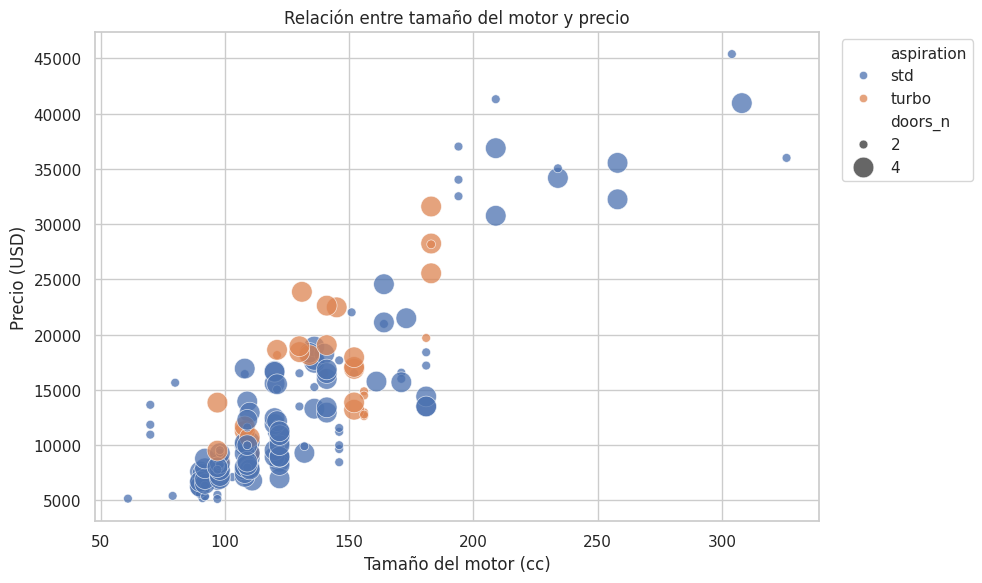

In [105]:
# Scatter plot engine_size vs price con color por aspiración y tamaño por número de puertas
scatter_df = cars_df.dropna(subset=['engine_size', 'price', 'aspiration', 'num_doors']).copy()
scatter_df['doors_n'] = scatter_df['num_doors'].map({'two': 2, 'four': 4})

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=scatter_df,
    x='engine_size',
    y='price',
    hue='aspiration',
    size='doors_n',
    sizes=(40, 220),
    alpha=0.75
)

plt.title('Relación entre tamaño del motor y precio')
plt.xlabel('Tamaño del motor (cc)')
plt.ylabel('Precio (USD)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Conclusión

Se identifica una relación positiva clara entre el tamaño del motor y el precio del automóvil: a mayor tamaño de motor, mayor tiende a ser el precio. Asimismo, los vehículos con aspiración turbo se concentran en rangos de precio superiores para tamaños de motor similares, lo que sugiere que esta característica incrementa el valor del vehículo. El número de puertas no muestra una tendencia marcada respecto al precio, aunque algunos vehículos de mayor precio corresponden a configuraciones de dos puertas, típicas de segmentos deportivos.
___

4. Genera un mapa de calor de la matriz de correlación entre las variables numéricas del conjunto de datos, mostrando los valores de correlación en cada celda.
* ¿Cuáles son las tres variables más correlacionadas con el precio?

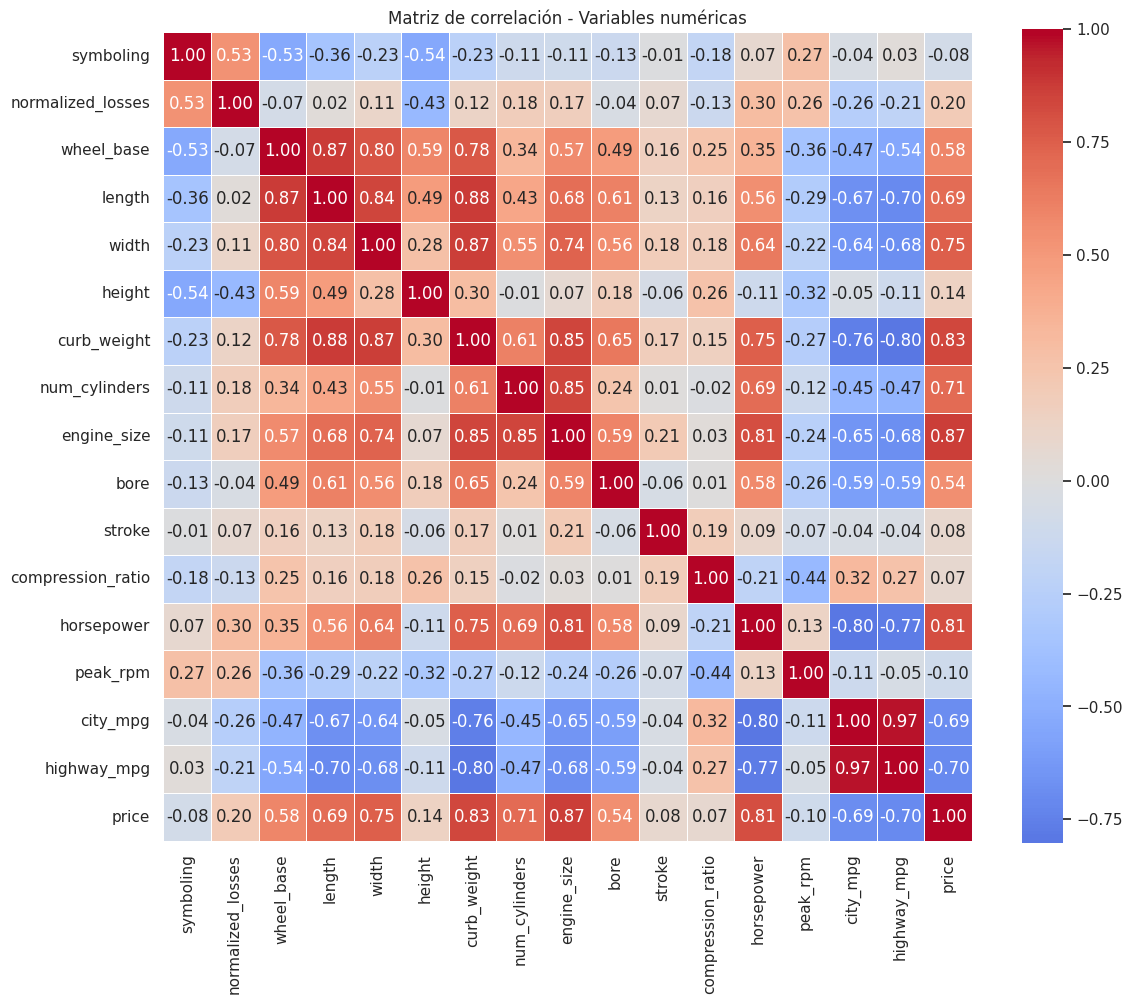

In [106]:
# Generar mapa de calor de la matriz de correlación entre variables numéricas
num_df = cars_df.select_dtypes(include=['int64','float64'])

corr_matrix = num_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Matriz de correlación - Variables numéricas")
plt.tight_layout()
plt.show()

In [107]:
# Obtener las 3 variables más correlacionadas con price (sin incluir price consigo mismo)
corr_price = corr_matrix['price'].drop('price').abs().sort_values(ascending=False)

top3_corr = corr_price.head(3)
top3_corr

,price
engine_size,0.872335
curb_weight,0.834415
horsepower,0.810533


#### Conclusión

El precio presenta una fuerte correlación positiva con el tamaño del motor (engine_size), el peso del vehículo (curb_weight) y la potencia del motor (horsepower). 

La variable con mayor correlación es engine_size (0.87), lo que indica que vehículos con motores más grandes tienden a tener precios más elevados. De manera similar, curb_weight (0.83) y horsepower (0.81) también muestran relaciones positivas significativas, lo que sugiere que características asociadas al tamaño y desempeño mecánico del automóvil son determinantes clave en la fijación del precio.
___

En el análisis de correlación se observa que existen muchos pares de variables altamente correlacionadas, lo que puede afectar el desempeño de los modelos de regresión. PCA resulta útil no solo para reducir la dimensionalidad, sino también porque los componentes principales son ortogonales entre sí, es decir, tienen correlación cero, evitando problemas de multicolinealidad. Esto lo podrás comprobrar más adelante.

# Ingeniería de características

5. Realiza las siguientes operaciones de ingeniería de características en las variables numéricas:
* Aplica `SimpleImputer` para tratar los valores faltantes, justificando la estrategia de imputación seleccionada.
* Considera `price` como la variable objetivo y guárdala en `y`. Separa los predictores numéricos en `X`. Con base en estos datos, ¿cuántos componentes principales se generarán al aplicar PCA?
* Escala los valores de `X` para que todas las variables contribuyan equitativamente y ninguna domine el análisis por tener una escala mayor.

PCA está diseñado principalmente para variables numéricas y funciona encontrando combinaciones lineales de las variables originales que capturan la mayor varianza en los datos. Normalmente se recomienda eliminar las variables categóricas antes de aplicar PCA y luego concatenarlas nuevamente con los resultados de PCA si se desea.

In [108]:
# Imputar valores faltantes en variables numéricas usando la mediana
num_df = cars_df.select_dtypes(include=['int64','float64']).copy()

imputer = SimpleImputer(strategy='median')

num_imputed = imputer.fit_transform(num_df)

num_imputed_df = pd.DataFrame(num_imputed, columns=num_df.columns)

In [109]:
# Separar variable objetivo (y) y predictores numéricos (X)
y = num_imputed_df['price']
X = num_imputed_df.drop(columns=['price'])

X.shape

(205, 16)

In [110]:
X.shape[1]

16

In [111]:
# Escalar variables numéricas para PCA
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

#### Conclusión

Se utilizó la mediana como estrategia de imputación debido a la presencia de valores atípicos y posibles distribuciones asimétricas en las variables numéricas, lo que hace que esta medida sea más robusta que la media.

Al separar la variable objetivo (price) de los predictores numéricos, se obtienen tantas componentes principales como variables predictoras numéricas, ya que PCA puede generar como máximo min(n_muestras, n_variables). En este caso, el número máximo de componentes corresponde al número de variables numéricas independientes.

Finalmente, se aplicó un escalamiento mediante StandardScaler para garantizar que todas las variables contribuyan equitativamente al análisis. Este paso es fundamental, ya que PCA se basa en la varianza y podría verse dominado por variables con mayor escala si no se estandarizan previamente.
___

6. Aplica `PCA` a los datos escalados para proyectarlos en el nuevo espacio de vectores.
* Asigna nombres descriptivos a los componentes principales en el dataframe resultante, utilizando la convención PC1, PC2, PC3, y así sucesivamente.
* Genera un mapa de calor con la matriz de correlaciones de los componentes principales para verificar que sean independientes entre sí.

In [112]:
# Aplicar PCA sobre los datos escalados
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [113]:
# Crear dataframe con nombres descriptivos para los componentes principales
pc_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]

pca_df = pd.DataFrame(X_pca, columns=pc_columns)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.918474,-2.397150,-0.410501,1.416623,-1.822817,1.203190,0.369729,0.288788,-1.088415,-0.347735,-0.474581,0.267610,-0.273617,0.362346,0.185204,0.003853
1,-0.918474,-2.397150,-0.410501,1.416623,-1.822817,1.203190,0.369729,0.288788,-1.088415,-0.347735,-0.474581,0.267610,-0.273617,0.362346,0.185204,0.003853
2,0.634430,-1.372747,0.872496,0.998222,1.834717,-0.774751,-0.515065,1.370499,-1.130802,-1.013703,0.502983,0.657052,0.174955,-0.008520,0.118635,-0.111688
3,-0.361470,-0.919214,0.451578,-1.489124,-0.269938,-0.789900,0.000484,0.400032,0.293338,0.168137,0.039239,-0.022832,-0.078891,-0.391786,0.009265,0.053641
4,1.172393,-1.794960,0.183773,-1.083812,0.113486,-0.861858,-0.353900,0.870186,0.015429,-0.447054,-0.055376,-0.416053,-0.049431,0.079357,-0.198402,0.046303


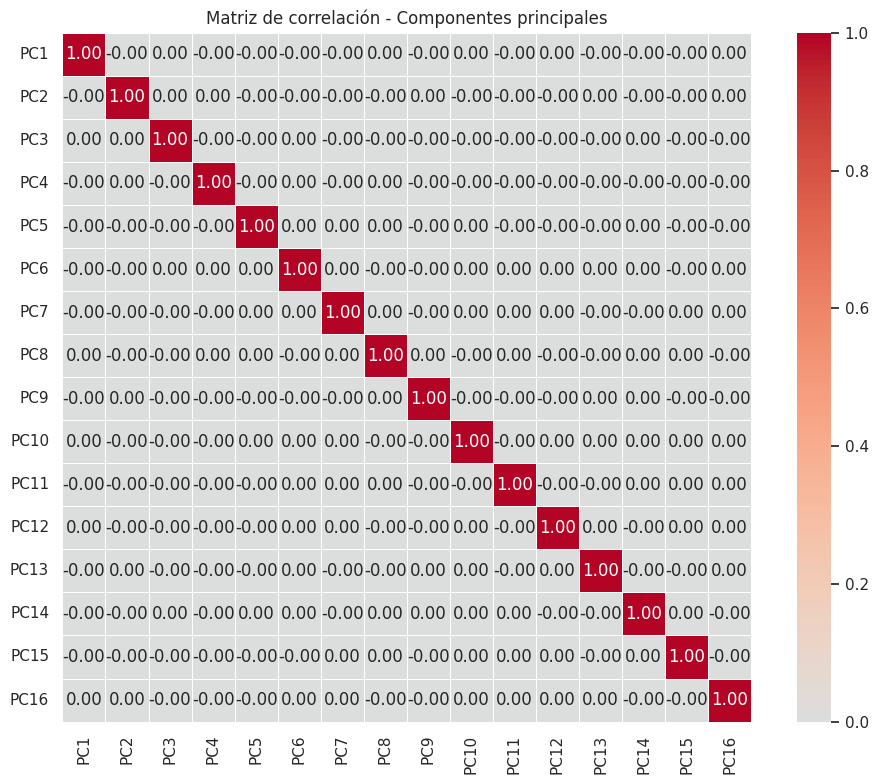

In [114]:
# Generar matriz de correlación de los componentes principales
pc_corr = pca_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    pc_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Matriz de correlación - Componentes principales")
plt.tight_layout()
plt.show()

#### Conclusión

El mapa de calor de la matriz de correlación de los componentes principales muestra que todos los valores fuera de la diagonal principal son prácticamente cero.

Esto confirma que los componentes principales son ortogonales entre sí, es decir, no presentan correlación lineal. Esta es una propiedad fundamental del PCA, ya que cada componente captura una porción única de la varianza total del conjunto de datos sin redundancia de información.

La diagonal principal presenta valores iguales a 1, lo cual es esperado, ya que cada componente está perfectamente correlacionado consigo mismo.

Los pequeños valores mostrados como -0.00 o 0.00 corresponden a errores numéricos de precisión computacional y pueden considerarse como cero en términos prácticos.
___

7. Obtén el porcentaje de varianza explicada por cada componente.
* Grafica la curva de varianza acumulada para determinar el número mínimo de componentes principales que explican más del 90% de la varianza total.

In [115]:
# Obtener porcentaje de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Varianza_Explicada': explained_variance,
    'Varianza_Acumulada': np.cumsum(explained_variance)
})

explained_variance_df

,Componente,Varianza_Explicada,Varianza_Acumulada
0,PC1,0.445502,0.445502
1,PC2,0.179280,0.624782
2,PC3,0.085758,0.710540
3,PC4,0.064369,0.774908
4,PC5,0.057352,0.832260
5,PC6,0.047808,0.880069
6,PC7,0.032507,0.912575
7,PC8,0.027275,0.939850
8,PC9,0.019398,0.959248
9,PC10,0.015544,0.974792


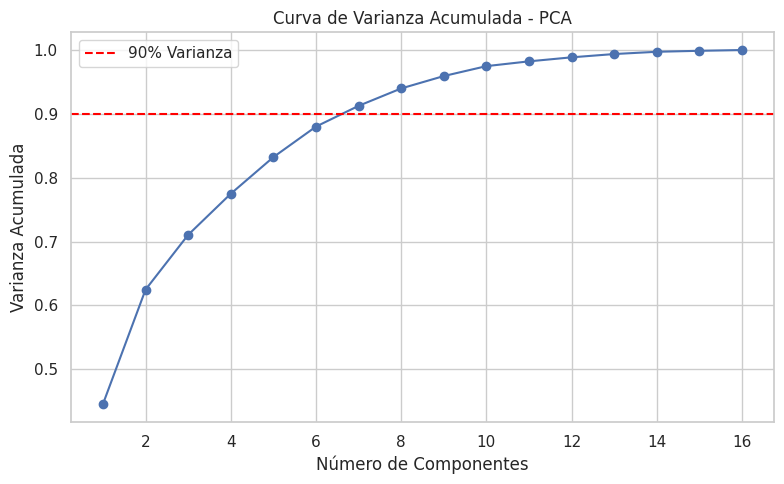

In [116]:
# Graficar curva de varianza acumulada
plt.figure(figsize=(8,5))

plt.plot(
    range(1, len(explained_variance) + 1),
    np.cumsum(explained_variance),
    marker='o'
)

plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Curva de Varianza Acumulada - PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
# Calcular número mínimo de componentes que explican más del 90%
n_components_90 = np.argmax(np.cumsum(explained_variance) >= 0.90) + 1
n_components_90


np.int64(7)

#### Conclusión

La curva de varianza acumulada muestra que los primeros componentes principales concentran la mayor parte de la información del conjunto de datos.

Se observa que con 6 componentes se explica aproximadamente el 88% de la varianza total, mientras que al incluir el séptimo componente se supera el umbral del 90%. 

Por lo tanto, el número mínimo de componentes principales necesarios para explicar más del 90% de la varianza total es 7.

Esto implica que es posible reducir el espacio original de 16 variables numéricas a solo 7 componentes principales, conservando la gran mayoría de la información y eliminando redundancia y multicolinealidad.
___

8. Imprime la información de los componentes seleccionados (cargas o pesos de las variables originales) para interpretar qué variables contribuyen más a cada componente principal.
* Dibuja un diagrama de barras que muestre qué variables originales aportan más al primer componente principal (PC1), para visualizar su influencia relativa.

In [118]:
# Obtener las cargas (pesos) de las variables originales en los componentes seleccionados (PC1..PC7)
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
)

loadings_selected = loadings.iloc[:, :7]
loadings_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
symboling,-0.097417,-0.402752,0.265425,-0.071656,-0.365914,0.173471,0.127779
normalized_losses,0.015730,-0.330804,0.308304,-0.343111,-0.376068,-0.492124,-0.322614
wheel_base,0.297827,0.264598,-0.029492,-0.228250,-0.004383,-0.183468,-0.106348
length,0.337567,0.138656,-0.043866,-0.194123,-0.073522,-0.082219,-0.008702
width,0.334154,0.055178,0.108578,-0.097712,-0.016414,-0.107151,0.139884
height,0.113918,0.421734,-0.282463,-0.186128,-0.016741,-0.214021,-0.002597
curb_weight,0.361949,0.022448,0.080318,-0.025091,-0.042322,-0.013540,0.061154
num_cylinders,0.245179,-0.114115,0.176730,0.552089,0.236661,-0.354144,-0.068332
engine_size,0.330140,-0.081608,0.198927,0.295503,0.108753,0.015613,-0.073093
bore,0.262714,0.003082,-0.138240,0.040725,-0.373004,0.511877,0.126249


In [119]:
# Mostrar las variables con mayor contribución absoluta por componente (PC1..PC7)
top_k = 5

for pc in loadings_selected.columns:
    print(f"\n{pc} - Top {top_k} variables por contribución absoluta")
    display(loadings_selected[pc].abs().sort_values(ascending=False).head(top_k))


PC1 - Top 5 variables por contribución absoluta


,PC1
curb_weight,0.361949
length,0.337567
width,0.334154
engine_size,0.330140
highway_mpg,0.317429



PC2 - Top 5 variables por contribución absoluta


,PC2
height,0.421734
symboling,0.402752
peak_rpm,0.363743
compression_ratio,0.360906
normalized_losses,0.330804



PC3 - Top 5 variables por contribución absoluta


,PC3
stroke,0.511606
compression_ratio,0.490226
normalized_losses,0.308304
height,0.282463
symboling,0.265425



PC4 - Top 5 variables por contribución absoluta


,PC4
num_cylinders,0.552089
stroke,0.430712
normalized_losses,0.343111
engine_size,0.295503
peak_rpm,0.289243



PC5 - Top 5 variables por contribución absoluta


,PC5
stroke,0.571744
normalized_losses,0.376068
bore,0.373004
symboling,0.365914
peak_rpm,0.341047



PC6 - Top 5 variables por contribución absoluta


,PC6
bore,0.511877
normalized_losses,0.492124
stroke,0.364450
num_cylinders,0.354144
peak_rpm,0.281574



PC7 - Top 5 variables por contribución absoluta


,PC7
compression_ratio,0.614078
peak_rpm,0.604268
normalized_losses,0.322614
horsepower,0.223857
stroke,0.152706


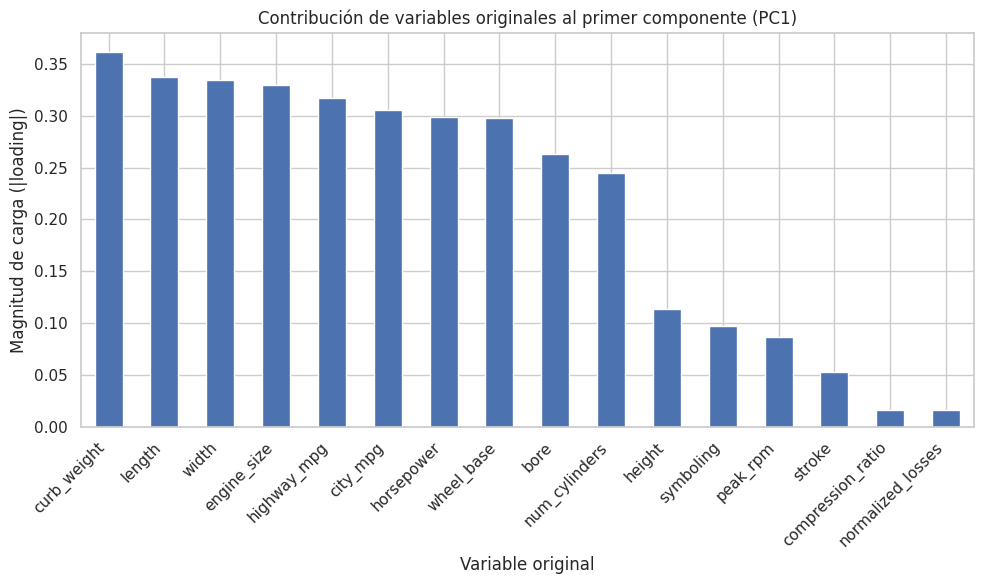

In [120]:
# Graficar las variables que más aportan a PC1 (cargas absolutas)
pc1_abs = loadings_selected['PC1'].abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
pc1_abs.plot(kind='bar')

plt.title('Contribución de variables originales al primer componente (PC1)')
plt.xlabel('Variable original')
plt.ylabel('Magnitud de carga (|loading|)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Conclusión

El primer componente principal (PC1) está dominado por variables relacionadas con el tamaño físico y la potencia del vehículo, tales como curb_weight, length, width, engine_size y horsepower.

También presentan una contribución importante las variables de eficiencia de combustible (city_mpg y highway_mpg), lo cual sugiere que este componente captura una dimensión general asociada al tamaño, peso y desempeño del automóvil.

En términos interpretativos, PC1 puede entenderse como un componente que representa una dimensión estructural del vehículo: automóviles más grandes, pesados y potentes se ubican en un extremo del componente, mientras que vehículos más pequeños y eficientes se ubican en el extremo opuesto.
___

9. Codifica las variables categóricas mediante *One-Hot Encoding* y utiliza el parámetro `drop='first'` para evitar problemas de multicolinealidad entre las variables dummy generadas.

In [121]:
# Seleccionar variables categóricas
cat_df = cars_df.select_dtypes(include=['object']).copy()

cat_df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')

In [122]:
# Aplicar One-Hot Encoding eliminando la primera categoría
encoder = OneHotEncoder(drop='first', sparse_output=False)

cat_encoded = encoder.fit_transform(cat_df)

encoded_columns = encoder.get_feature_names_out(cat_df.columns)

cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoded_columns, index=cars_df.index)

cat_encoded_df.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [123]:
# Verificar dimensión del nuevo dataframe codificado
cat_encoded_df.shape

(205, 44)

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas y la variable de salida.
* Almacena el dataframe resultante en archivo.

In [124]:
# Obtener estadísticas descriptivas para variables numéricas
num_df = cars_df.select_dtypes(include=['int64','float64'])

desc_num = num_df.describe().T
desc_num['skewness'] = num_df.skew()
desc_num['kurtosis'] = num_df.kurt()

desc_num

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00,0.211072,-0.676271
normalized_losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00,0.765976,0.525440
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90,1.050214,1.017039
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10,0.155954,-0.082895
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30,0.904003,0.702764
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80,0.063123,-0.443812
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00,0.681398,-0.042854
num_cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00,2.817459,13.714866
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00,1.947655,5.305682
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94,0.020016,-0.828945


In [125]:
# Recuperar variable objetivo original
y = num_imputed_df['price']

In [126]:
# Volver a crear PCA con 7 componentes
pca_final = PCA(n_components=7)
X_pca_7 = pca_final.fit_transform(X_scaled)

pc_columns = [f'PC{i+1}' for i in range(7)]

pca_7_df = pd.DataFrame(X_pca_7, columns=pc_columns, index=cars_df.index)

pca_7_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.918474,-2.397150,-0.410501,1.416623,-1.822817,1.203190,0.369729
1,-0.918474,-2.397150,-0.410501,1.416623,-1.822817,1.203190,0.369729
2,0.634430,-1.372747,0.872496,0.998222,1.834717,-0.774751,-0.515065
3,-0.361470,-0.919214,0.451578,-1.489124,-0.269938,-0.789900,0.000484
4,1.172393,-1.794960,0.183773,-1.083812,0.113486,-0.861858,-0.353900


In [127]:
# Concatenar componentes principales + variables categóricas codificadas + target
final_df = pd.concat([pca_7_df, cat_encoded_df, y], axis=1)

final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,make_audi,make_bmw,make_chevrolet,...,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,price
0,-0.918474,-2.397150,-0.410501,1.416623,-1.822817,1.203190,0.369729,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13495.0
1,-0.918474,-2.397150,-0.410501,1.416623,-1.822817,1.203190,0.369729,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16500.0
2,0.634430,-1.372747,0.872496,0.998222,1.834717,-0.774751,-0.515065,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16500.0
3,-0.361470,-0.919214,0.451578,-1.489124,-0.269938,-0.789900,0.000484,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13950.0
4,1.172393,-1.794960,0.183773,-1.083812,0.113486,-0.861858,-0.353900,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17450.0


In [128]:
# Guardar el dataset final procesado
final_df.to_csv("cars_processed_pca.csv", index=False)